In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import time

# Track time
start_time = time.time()

# 1️⃣ Load full dataset
df = pd.read_csv('archive (4).zip')

# 2️⃣ Check size and sample 5 million or full dataset if smaller
sample_size = min(500000, len(df))  # never exceed actual size
df_sample = df.sample(n=sample_size, random_state=42)

print(f"Dataset loaded and sampled: {df_sample.shape[0]} rows")

# 3️⃣ Convert boolean columns
df_sample['Fertilizer_Used'] = df_sample['Fertilizer_Used'].astype(int)
df_sample['Irrigation_Used'] = df_sample['Irrigation_Used'].astype(int)

# 4️⃣ Encode categoricals
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
for col in categorical_cols:
    le = LabelEncoder()
    df_sample[col] = le.fit_transform(df_sample[col])

# 5️⃣ Features and target
X = df_sample.drop(columns=['Yield_tons_per_hectare'])
y = df_sample['Yield_tons_per_hectare']

print("\nSummary Statistics (full dataset):")
print(df.describe())

print("\nMedian for each column:")
print(df.median(numeric_only=True))

print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")



Dataset loaded and sampled: 500000 rows

Summary Statistics (full dataset):
          Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372  

Median for each column:
Rainfall_mm               550.124061
Temper


Random Forest Model Results (500000 rows):
Mean Squared Error: 0.268
R-squared Score: 0.907
Model fitting time: 32.76 seconds
Total runtime: 40.05 seconds


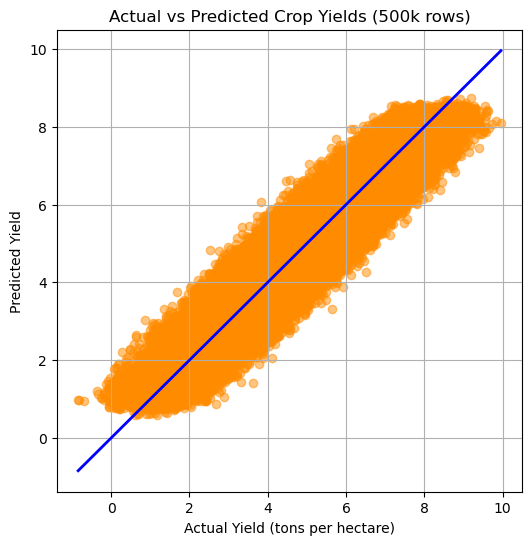

In [17]:
# 6️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7️⃣ Train model
fit_start = time.time()
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 uses all CPU cores
model.fit(X_train, y_train)
fit_end = time.time()

# 8️⃣ Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest Model Results (500000 rows):")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared Score: {r2:.3f}")
print(f"Model fitting time: {fit_end - fit_start:.2f} seconds")
print(f"Total runtime: {time.time() - start_time:.2f} seconds")

# 9️⃣ Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkorange')
plt.xlabel('Actual Yield (tons per hectare)')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Crop Yields (500k rows)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', lw=2)  # perfect line
plt.grid(True)
plt.show()

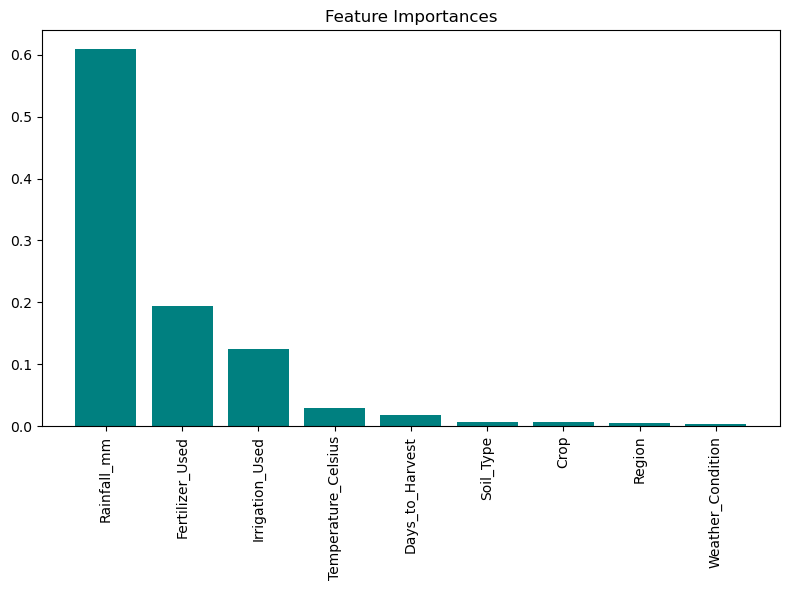

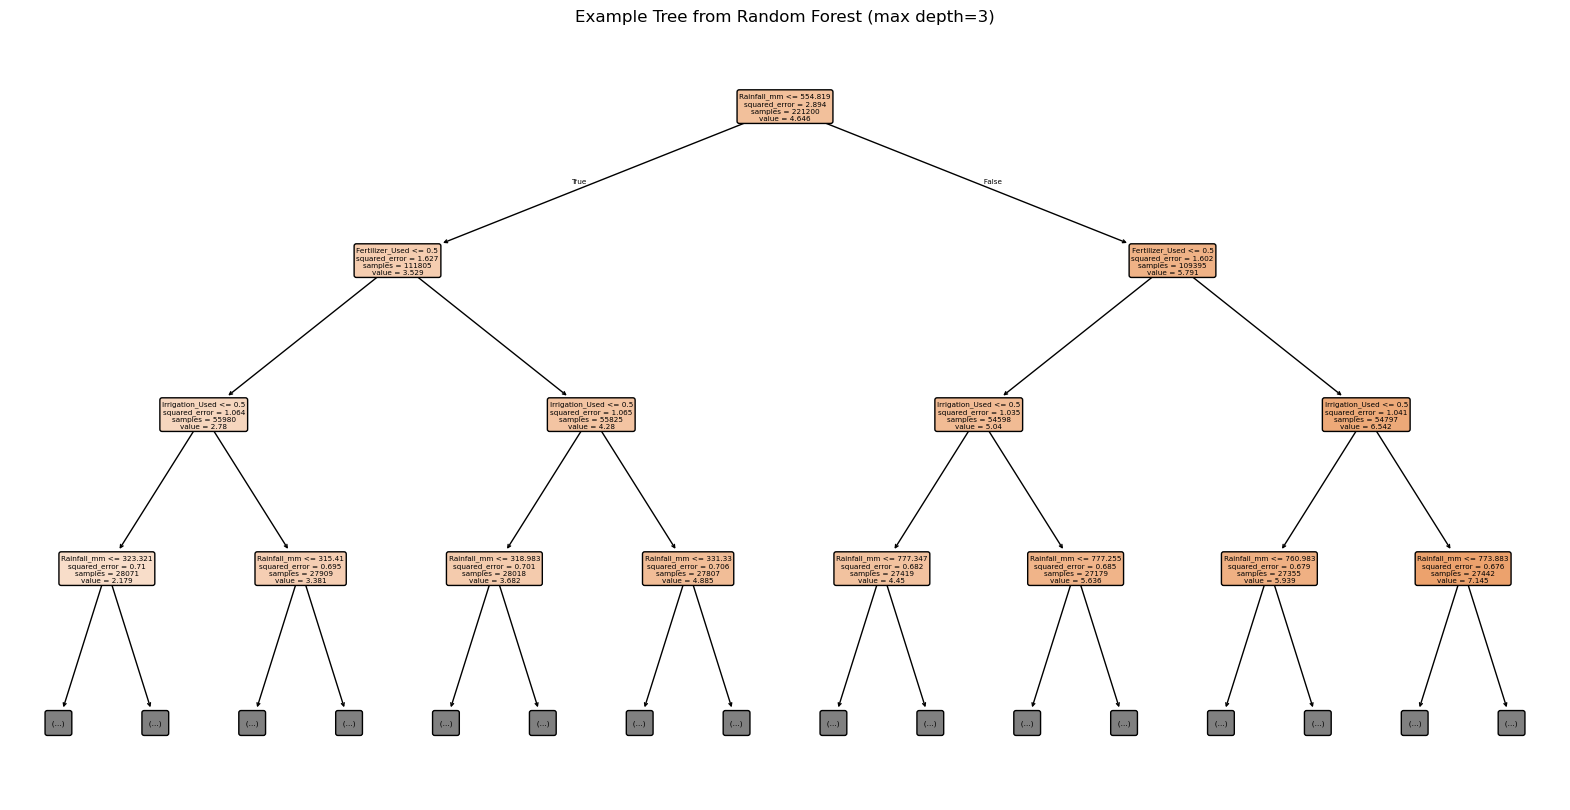

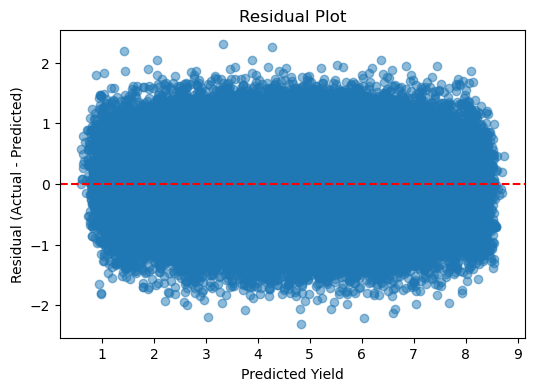

In [ ]:
from sklearn.tree import plot_tree
import numpy as np

# ✅ 1️⃣ Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='teal', align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))
plot_tree(model.estimators_[0], feature_names=feature_names, filled=True, rounded=True, max_depth=3)
plt.title("Example Tree from Random Forest")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Yield")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import time

# Track time
start_time = time.time()

# Load full dataset
df = pd.read_csv('archive (4).zip')

# Check size and sample 500,000 or full dataset if smaller
sample_size = min(500000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

print(f"Dataset loaded and sampled: {df_sample.shape[0]} rows")

# EDA: Summary Statistics BEFORE sampling
print("\nSummary Statistics (full dataset):")
print(df.describe())

print("\nMedian for each column:")
print(df.median(numeric_only=True))

print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

# Preprocessing
df_sample['Fertilizer_Used'] = df_sample['Fertilizer_Used'].astype(int)
df_sample['Irrigation_Used'] = df_sample['Irrigation_Used'].astype(int)

categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
for col in categorical_cols:
    le = LabelEncoder()
    df_sample[col] = le.fit_transform(df_sample[col])

X = df_sample.drop(columns=['Yield_tons_per_hectare'])
y = df_sample['Yield_tons_per_hectare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

#Evaluate all models
results = []

print("\nStarting model training + evaluation...")
for name, model in models.items():
    print(f"Training: {name}")
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append((name, mse, rmse, train_time))
    print(f"{name} complete: MSE={mse:.3f}, RMSE={rmse:.3f}, Time={train_time:.2f} sec\n")

#Display results
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'Training Time (s)']).sort_values(by='MSE')
print("\nModel Comparison Results (sorted by MSE):")
print(results_df)

print(f"\nTotal runtime for full pipeline: {time.time() - start_time:.2f} seconds")



Dataset loaded and sampled: 500000 rows

Summary Statistics (full dataset):
          Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372  

Median for each column:
Rainfall_mm               550.124061
Temper